In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/emaize


In [3]:
import h5py

In [4]:
with h5py.File('tmp/fast_anova.h5', 'r') as f:
    pvals = f['/female/trait1'][:]

In [6]:
with h5py.File('data/parent_genotype_2bit/all_matrix', 'r') as f:
    X_female = f['X_female'][:]

In [24]:
with h5py.File('data/phenotypes/parent', 'r') as f:
    phenotypes = f['/female/trait1'][:]

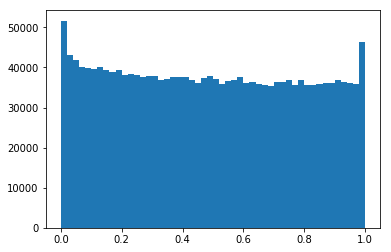

In [9]:
h = hist(pvals, bins=50)

In [10]:
sig_ind = np.nonzero(pvals < 0.01)[0]

In [27]:
X_sig = X_female[:, sig_ind*2+1]

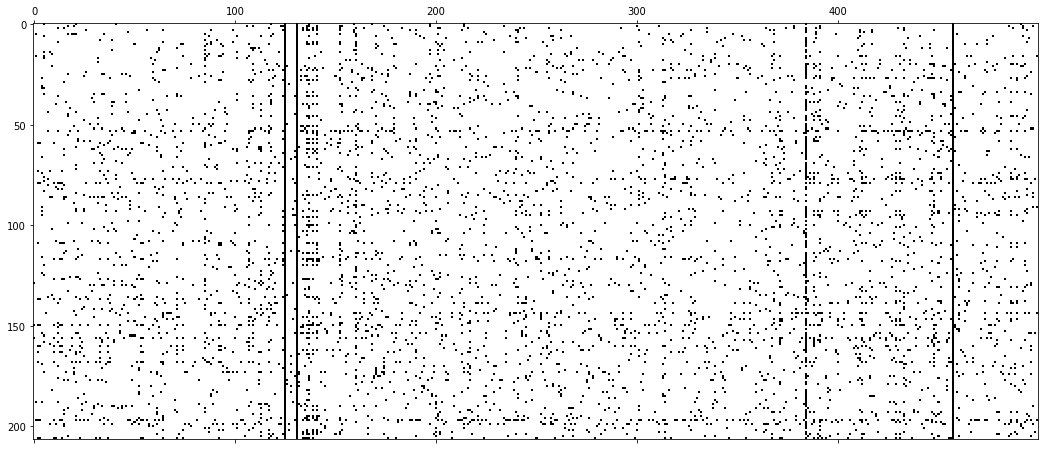

In [23]:
fig, ax = subplots(figsize=(18, 8))
ax.matshow(X_female[:, sig_ind*2+1][:, :500], cmap=cm.Greys)

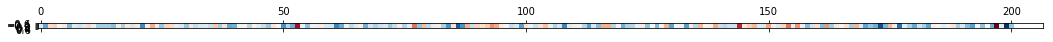

In [26]:
fig, ax = subplots(figsize=(18, 8))
ax.matshow(phenotypes.reshape((1, -1)), cmap=cm.RdBu)

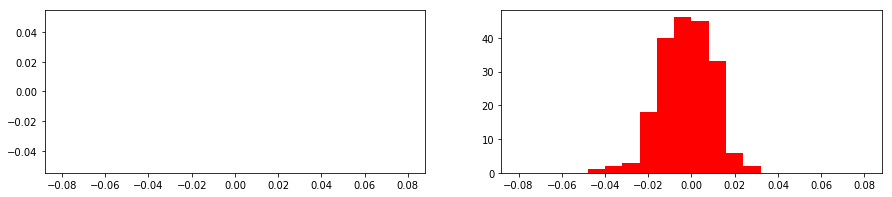

In [76]:
i = 11
x1 = phenotypes[ X_sig[:, i].astype('bool')][:-6]
x2 = phenotypes[~X_sig[:, i].astype('bool')][:-6]
fig, ax = subplots(1, 2, figsize=(15, 3))
bins= np.linspace(-0.08, 0.08, 21, endpoint=True)
ax[0].hist(x1, bins=bins, label='x1', color='b')
ax[1].hist(x2, bins=bins, label='x2', color='r')
pass

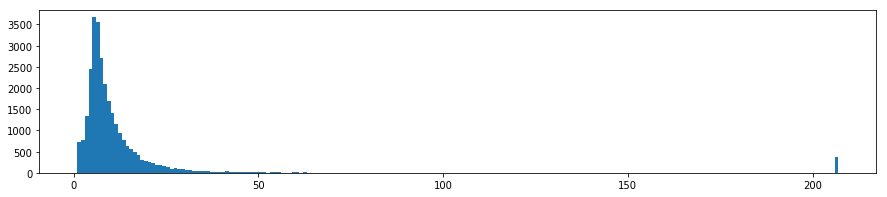

In [75]:
fig, ax = subplots(figsize=(15, 3))
h = ax.hist(X_sig.sum(axis=0), bins=206)